In [1]:
import pandas as pd
import numpy as np
from datascience import *
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True
import warnings
warnings.simplefilter('ignore')

/home/ali/.local/lib/python3.6/site-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/home/ali/.local/lib/python3.6/site-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [2]:
df = pd.read_csv('extracted_dataset.csv')
df.drop(['Repeating Frequency', 'Avg. Grade - Prev. Attempts', 'Avg. Grade - Subject'], axis=1, inplace=True)
df.head()

,Course Code,Course Title,Type,Course Year,Student Number,Department Code,Course Level,GPA,Standing,Semester of Student,...,Completed ECTS,Avg. Grade - Taken,Avg. Grade - Student_Subject,Letter Grade,Status,Semester,Theoritical,Practical,Course Credit,ECTS
0,UNI 113,Textual Analysis and Effective Com. I,NaN,1,351,IE,Undergraduate,4.05,Freshman,1,...,30,C,B-,A+,Successful,2010 - Fall,3,0,3,5
1,UNI 115,Turkish for International Students I,NaN,1,344,EE,Undergraduate,4.03,Freshman,1,...,30,A,B-,A+,Successful,2010 - Fall,3,0,3,5
2,EM 475,Stratejik Yönetim,NaN,4,1225,MBA/NT,Graduate,3.33,Freshman,1,...,15,B+,B+,B,Successful,2010 - Fall,3,0,3,5
3,CULT 511,Postcolonial Studies,NaN,5,292,CULT/T,Graduate,3.80,Freshman,1,...,15,A-,B+,A-,Successful,2010 - Fall,3,0,3,5
4,UNI 101,Mathematical Reasoning,NaN,1,144,MGT,Undergraduate,3.62,Freshman,1,...,30,C,B-,C,Successful,2010 - Fall,3,0,3,5


In [3]:
df.drop([df.columns[0], df.columns[1], df.columns[2], df.columns[4]], inplace=True, axis=1)
df.head()

,Course Year,Department Code,Course Level,GPA,Standing,Semester of Student,Completed Credits,Completed ECTS,Avg. Grade - Taken,Avg. Grade - Student_Subject,Letter Grade,Status,Semester,Theoritical,Practical,Course Credit,ECTS
0,1,IE,Undergraduate,4.05,Freshman,1,18,30,C,B-,A+,Successful,2010 - Fall,3,0,3,5
1,1,EE,Undergraduate,4.03,Freshman,1,18,30,A,B-,A+,Successful,2010 - Fall,3,0,3,5
2,4,MBA/NT,Graduate,3.33,Freshman,1,9,15,B+,B+,B,Successful,2010 - Fall,3,0,3,5
3,5,CULT/T,Graduate,3.80,Freshman,1,9,15,A-,B+,A-,Successful,2010 - Fall,3,0,3,5
4,1,MGT,Undergraduate,3.62,Freshman,1,18,30,C,B-,C,Successful,2010 - Fall,3,0,3,5


In [4]:
df = pd.concat([df, pd.get_dummies(df['Course Year'], prefix='Course Year'), pd.get_dummies(df['Department Code'], prefix='Department Code'), pd.get_dummies(df['Course Level'], prefix='Course Level'), pd.get_dummies(df['Standing'], prefix='Standing'), pd.get_dummies(df['Semester of Student'], prefix='Semester of Student'), pd.get_dummies(df['Avg. Grade - Taken'], prefix='Avg. Grade - Taken'), pd.get_dummies(df['Avg. Grade - Student_Subject'], prefix='Avg. Grade - Student_Subject'), pd.get_dummies(df['Status'], prefix='Status')], axis=1)
df.drop(['Course Year', 'Department Code', 'Course Level', 'Status', 'Avg. Grade - Student_Subject', 'Avg. Grade - Taken', 'Semester of Student', 'Standing'], axis=1, inplace=True)
df

,GPA,Completed Credits,Completed ECTS,Letter Grade,Semester,Theoritical,Practical,Course Credit,ECTS,Course Year_1,...,Avg. Grade - Student_Subject_B,Avg. Grade - Student_Subject_B+,Avg. Grade - Student_Subject_B-,Avg. Grade - Student_Subject_C,Avg. Grade - Student_Subject_C+,Avg. Grade - Student_Subject_C-,Avg. Grade - Student_Subject_D+,Status_Recorded,Status_Successful,Status_Unsuccessful
0,4.05,18,30,A+,2010 - Fall,3,0,3,5,1,...,0,0,1,0,0,0,0,0,1,0
1,4.03,18,30,A+,2010 - Fall,3,0,3,5,1,...,0,0,1,0,0,0,0,0,1,0
2,3.33,9,15,B,2010 - Fall,3,0,3,5,0,...,0,1,0,0,0,0,0,0,1,0
3,3.80,9,15,A-,2010 - Fall,3,0,3,5,0,...,0,1,0,0,0,0,0,0,1,0
4,3.62,18,30,C,2010 - Fall,3,0,3,5,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49342,0.83,18,30,D,2014 - Spring,3,0,3,5,0,...,0,0,0,0,1,0,0,0,1,0
49343,2.40,12,24,B,2014 - Spring,3,0,3,6,0,...,1,0,0,0,0,0,0,0,1,0
49344,2.42,19,29,D,2014 - Spring,3,0,3,5,0,...,0,0,0,1,0,0,0,0,1,0
49345,4.00,3,5,A,2014 - Spring,3,0,3,5,0,...,0,0,0,0,1,0,0,0,1,0


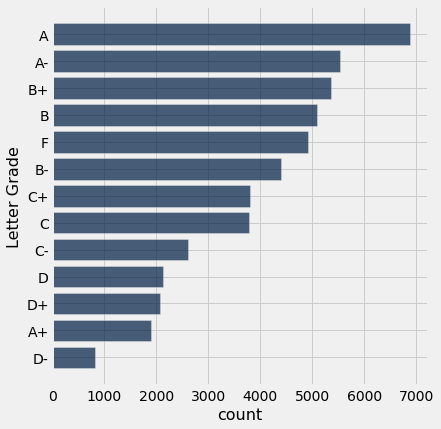

In [5]:
Table().with_column('Letter Grade', df['Letter Grade']).group(0).sort('count', descending=True).barh('Letter Grade')

In [6]:
columns = df.columns
columns

Index(['GPA', 'Completed Credits', 'Completed ECTS', 'Letter Grade',
       'Semester', 'Theoritical', 'Practical', 'Course Credit', 'ECTS',
       'Course Year_1', 'Course Year_2', 'Course Year_3', 'Course Year_4',
       'Course Year_5', 'Course Year_6', 'Department Code_BGM/NT',
       'Department Code_BGM/T', 'Department Code_CS', 'Department Code_CTV',
       'Department Code_CULT/T', 'Department Code_DSE/T',
       'Department Code_ECE/NT', 'Department Code_ECE/T', 'Department Code_EE',
       'Department Code_HIST', 'Department Code_HIST PhD',
       'Department Code_HIST/T', 'Department Code_HUK', 'Department Code_IE',
       'Department Code_ISE/NT', 'Department Code_ISE/T',
       'Department Code_ISS', 'Department Code_ITM', 'Department Code_KHUK/NT',
       'Department Code_KHUK/T', 'Department Code_LIT',
       'Department Code_MBA/NT', 'Department Code_MGT',
       'Department Code_MTS/T', 'Department Code_PHIL', 'Department Code_POLS',
       'Department Code_POLS/NT', '

In [7]:
def get_train_data(df, train_sem, columns):
    dataFrame = pd.DataFrame(columns=columns)
    for sem in train_sem:
        dataFrame = pd.concat([dataFrame, df[df.iloc[:, 4] == sem]], ignore_index=True)
    for idx in dataFrame.index:
        semester = dataFrame.iloc[idx, 4]
        dataFrame.iloc[idx, 4] = semester.split()[2].strip()
    
    X_train = dataFrame.drop('Semester', axis=1)
    y_train = X_train.pop('Letter Grade')
    return X_train, y_train

In [8]:
def normalize_X(X):
    cols = X.columns
    sc = StandardScaler()
    X = sc.fit_transform(X)
    return pd.DataFrame(X, columns=cols)

In [9]:
def get_f1_score(df, columns):
    f1_scores = {}
    sorted_semesters = sorted(set(df.iloc[:, 4]))
    for sem_idx in range(1, len(sorted_semesters)):
        training_sem = sorted_semesters[:sem_idx]
        test_sem = sorted_semesters[sem_idx]
        X_train, y_train = get_train_data(df, training_sem, columns)
        X_test = df[df.iloc[:, 4] == test_sem]
        X_test.drop('Semester', axis=1, inplace=True)
        y_test = X_test.pop('Letter Grade')
        X_train = normalize_X(X_train)
        X_test = normalize_X(X_test)
        svm = SVC()
        rf = RandomForestClassifier()
        lr = LogisticRegression()
        svm.fit(X_train, y_train)
        rf.fit(X_train, y_train)
        lr.fit(X_train, y_train)
        f1_scores.setdefault(str(sem_idx), {})
        f1_scores[str(sem_idx)].setdefault('svm_test', [])
        f1_scores[str(sem_idx)].setdefault('rf_test', [])
        f1_scores[str(sem_idx)].setdefault('lr_test', [])
        f1_scores[str(sem_idx)].setdefault('svm_train', [])
        f1_scores[str(sem_idx)].setdefault('rf_train', [])
        f1_scores[str(sem_idx)].setdefault('lr_train', [])
        f1_scores[str(sem_idx)]['svm_test'].append(f1_score(y_test, svm.predict(X_test), average='micro'))
        f1_scores[str(sem_idx)]['rf_test'].append(f1_score(y_test, rf.predict(X_test), average='micro'))
        f1_scores[str(sem_idx)]['lr_test'].append(f1_score(y_test, lr.predict(X_test), average='micro'))
        f1_scores[str(sem_idx)]['svm_train'].append(f1_score(y_train, svm.predict(X_train), average='micro'))
        f1_scores[str(sem_idx)]['rf_train'].append(f1_score(y_train, rf.predict(X_train), average='micro'))
        f1_scores[str(sem_idx)]['lr_train'].append(f1_score(y_train, lr.predict(X_train), average='micro'))
    return f1_scores

In [10]:
scores = get_f1_score(df, columns)

In [31]:
scores = {int(k):v for k,v in scores.items()}

In [32]:
table = Table().with_column('Number of Training Semesters', scores.keys())
table

Number of Training Semesters
1
2
3
4
5
6
7
8
9
10


In [33]:
f1_scores = {}
for k in sorted(scores):
    for res in scores[k]:
        f1_scores.setdefault(res, [])
        f1_scores[res].append(scores[k][res][0])

In [34]:
for model in f1_scores:
    table = table.with_column(model, f1_scores[model])

In [35]:
table

Number of Training Semesters,svm_test,rf_test,lr_test,svm_train,rf_train,lr_train
1,0.351415,0.353774,0.353774,0.478261,0.810559,0.537267
2,0.25,0.3125,0.25,0.489276,0.845845,0.520107
3,0.259362,0.301664,0.283634,0.482368,0.84005,0.516373
4,0.285714,0.313844,0.336459,0.434258,0.850626,0.448569
5,0.323944,0.323944,0.276995,0.428007,0.842677,0.41714
6,0.297415,0.313197,0.315374,0.432661,0.846551,0.415767
7,0.325619,0.325853,0.34806,0.422704,0.860653,0.402293
8,0.358289,0.368984,0.352941,0.425051,0.867294,0.389849
9,0.29385,0.305886,0.32071,0.422671,0.869648,0.392406
10,0.312136,0.30464,0.325708,0.41305,0.878878,0.37692


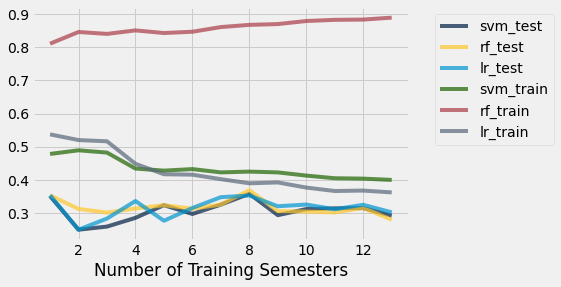

In [36]:
table.plot('Number of Training Semesters')